In [ ]:
'''
Movie Genre Data Analysis

## Introduction
We are going to focus highly on genre's. I want to know everything about Genre's.

Here are some things I want to look at:

### Research Questions (Q):
1. Which genres are the most common (number of movies made)?
2. Which genres have high av. budget and revenue?
3. Which genres have high av. popularity?
4. Which genres have the highest number of movies with a voting avg. >=8?

### Research Hypotheses (H):
1. The best movies according to vote avg. return high profit and revenue.
2. The best movies according to popularity return high profit and revenue.
3. Highly budgeted movies return high revenue and profit.
4. Highly budgeted movies have a high popularity.
'''

In [10]:
import pandas as pd

In [68]:
movies= pd.read_csv(r'/Users/joblethomas/Desktop/Learning/Python/Movie Genres Data Analysis/imdb_movies.csv')

In [16]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10842 non-null  int64  
 1   imdb_id               10834 non-null  object 
 2   popularity            10842 non-null  float64
 3   budget                10842 non-null  int64  
 4   revenue               10842 non-null  int64  
 5   original_title        10842 non-null  object 
 6   cast                  10767 non-null  object 
 7   homepage              2931 non-null   object 
 8   director              10800 non-null  object 
 9   tagline               8036 non-null   object 
 10  keywords              9367 non-null   object 
 11  overview              10839 non-null  object 
 12  runtime               10842 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9826 non-null   object 
 15  release_date       

In [69]:
pd.set_option('display.max.row',11000 )
pd.set_option('display.max.columns',22 )

In [18]:
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360


In [14]:
movies.drop_duplicates(inplace = True)

In [15]:
movies.dropna(subset = ['genres'], inplace = True)

In [17]:
movies['profit'] = movies['revenue'] - movies['budget']

In [20]:
movies_genre = movies[['popularity', 'budget', 'revenue','original_title', 'runtime', 'genres', 'release_date', 'vote_count', 'vote_average', 'profit' ]]

In [23]:
movies_genre.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,1316249360


In [25]:
from pandas import Series, DataFrame
movies_genre['genres'].str.split('|').apply(Series,1).stack()

0      0             Action
       1          Adventure
       2    Science Fiction
       3           Thriller
1      0             Action
                 ...       
10863  0            Mystery
       1             Comedy
10864  0             Action
       1             Comedy
10865  0             Horror
Length: 26955, dtype: object

In [28]:
split = movies_genre['genres'].str.split('|').apply(Series,1).stack()
split.index = split.index.droplevel(-1)
split
split.name = 'genres_split'
del movies_genre['genres']
movies_genre = movies_genre.join(split)

In [29]:
movies_genre

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,profit,genres_split
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,1363528810,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,5/13/15,6185,7.1,228436354,Action
...,...,...,...,...,...,...,...,...,...,...
10863,0.065141,0,0,Beregis Avtomobilya,94,1/1/66,11,6.5,0,Mystery
10863,0.065141,0,0,Beregis Avtomobilya,94,1/1/66,11,6.5,0,Comedy
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,11/2/66,22,5.4,0,Action
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,11/2/66,22,5.4,0,Comedy


In [ ]:
'''
### Research Questions (Q):
1. Which genres are the most common (number of movies made)?
'''

In [38]:
genres_count=pd.DataFrame(movies_genre.groupby('genres_split').original_title.nunique()).sort_values('original_title',ascending = True)

In [34]:
genres_count

,original_title
genres_split,
Drama,4672
Comedy,3750
Thriller,2841
Action,2339
Romance,1686
Horror,1580
Adventure,1442
Crime,1337
Family,1211


<Axes: title={'center': 'Movies Per Genre in %'}, ylabel='original_title'>

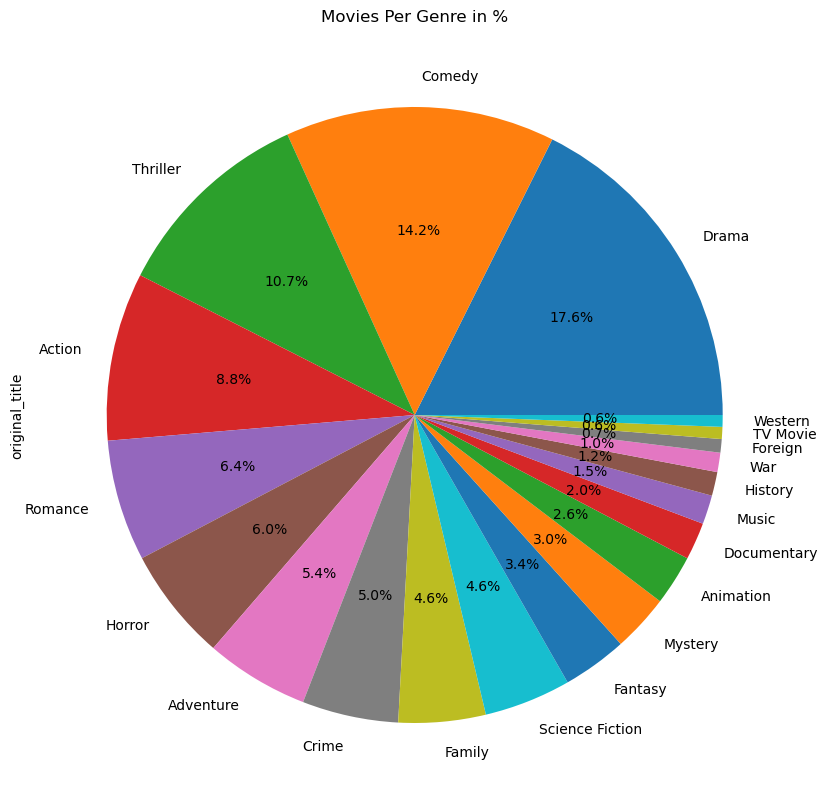

In [36]:
genres_count['original_title'].plot.pie(title = 'Movies Per Genre in %', autopct= '%1.1f%%', figsize = (10,10))

<Axes: title={'center': 'Movies per Genre'}, ylabel='genres_split'>

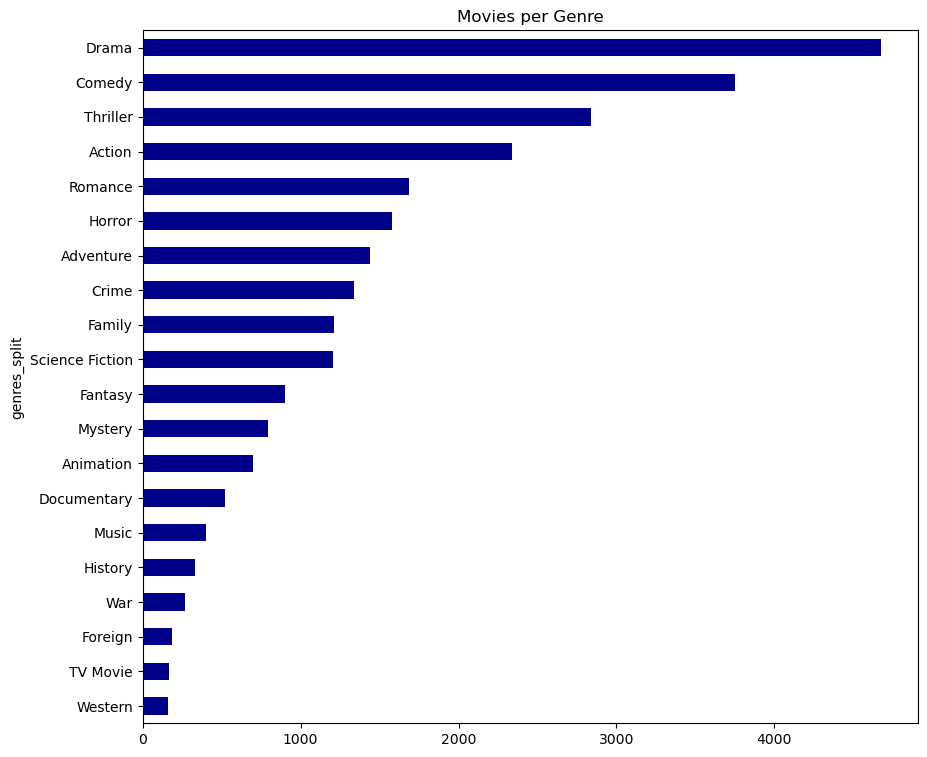

In [40]:
genres_count['original_title'].plot.barh(title = 'Movies per Genre', color = 'DarkBlue', figsize =(10,9))

In [ ]:
'''
### Research Questions (Q):
2. Which genres have high av. budget and revenue?
'''

In [42]:
genres_avg= movies_genre.groupby('genres_split').mean()
pd.options.display.float_format = '{:2f}'.format
genres_avg

/var/folders/g5/nhtdkkkd2mj4nprp7q9rlh4c0000gn/T/ipykernel_75786/2920306403.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  genres_avg= movies_genre.groupby('genres_split').mean()


,popularity,budget,revenue,runtime,vote_count,vote_average,profit
genres_split,,,,,,,
Action,0.926274,27727820.331376,72794732.002517,104.917785,392.993708,5.787752,45066911.671141
Adventure,1.154259,37543694.530931,113137861.069341,106.173351,513.125085,5.940585,75594166.538409
Animation,0.852182,23159781.606581,75256062.223176,68.181688,303.000000,6.403147,52096280.616595
Comedy,0.592607,13297915.618244,37526242.072238,96.745057,176.436330,5.905167,24228326.453994
Crime,0.744930,17663801.124815,42368661.645495,106.917282,278.805022,6.124889,24704860.520679
Documentary,0.181432,577149.148077,2041106.994231,102.651923,35.105769,6.908462,1463957.846154
Drama,0.591495,11880717.773529,29232255.725840,110.478151,182.544538,6.165546,17351537.952311
Family,0.786668,23359337.420796,72433176.373680,89.603574,272.320877,5.997563,49073838.952884
Fantasy,0.992840,32612585.348253,96313657.081878,100.736900,420.741266,5.863537,63701071.733624


In [48]:
genres_avg.sort_values('revenue', ascending = True, inplace = True)

<Axes: title={'center': 'Budget and Revenue by Genre'}, ylabel='genres_split'>

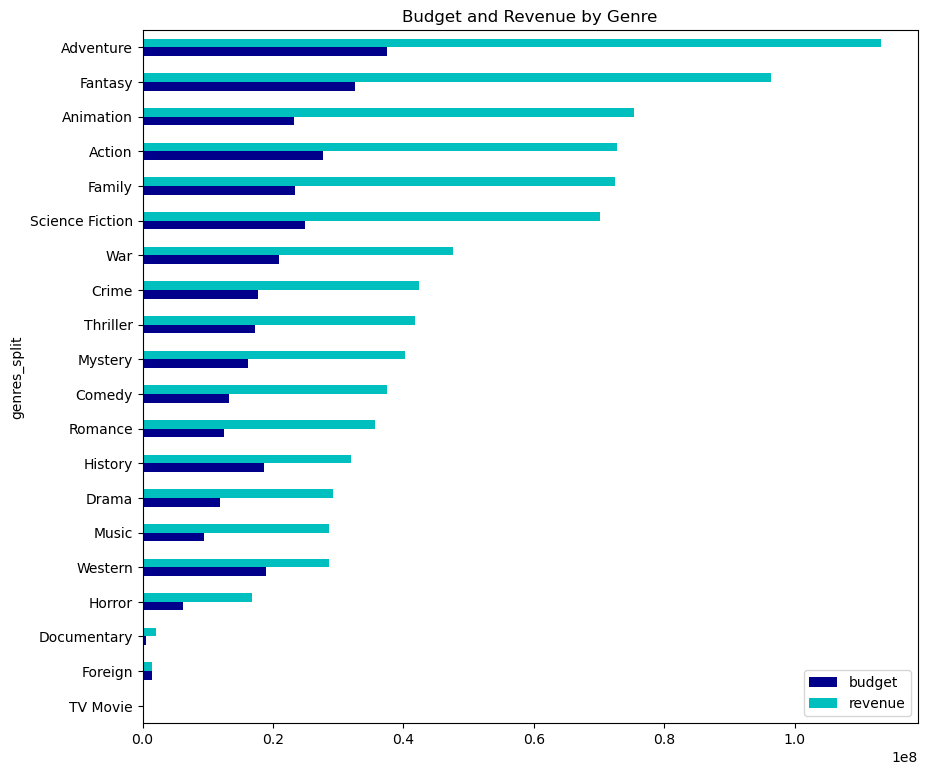

In [49]:
genres_avg[['budget','revenue']].plot.barh(title = 'Budget and Revenue by Genre', color = ('DarkBlue','c'), figsize =(10,9))

In [ ]:
'''
### Research Questions (Q):
2.5 Which genres have high av. popularity?
'''

In [50]:
genres_avg

,popularity,budget,revenue,runtime,vote_count,vote_average,profit
genres_split,,,,,,,
TV Movie,0.270896,267664.670659,251497.005988,91.982036,34.365269,5.788024,-16167.664671
Foreign,0.191496,1451434.925532,1520459.835106,107.228723,16.627660,5.981383,69024.909574
Documentary,0.181432,577149.148077,2041106.994231,102.651923,35.105769,6.908462,1463957.846154
Horror,0.465357,6226529.210751,16822808.624313,94.424557,120.059866,5.337447,10596279.413561
Western,0.590615,18974107.975758,28568709.284848,117.575758,205.739394,6.083030,9594601.309091
Music,0.487321,9438627.549020,28571768.691176,105.137255,124.340686,6.480392,19133141.142157
Drama,0.591495,11880717.773529,29232255.725840,110.478151,182.544538,6.165546,17351537.952311
History,0.575936,18594919.302395,32011793.215569,136.206587,183.772455,6.410479,13416873.913174
Romance,0.592082,12531271.847547,35691972.327103,106.891355,166.070678,6.042874,23160700.479556


<Axes: title={'center': 'Profit by Genre'}, ylabel='genres_split'>

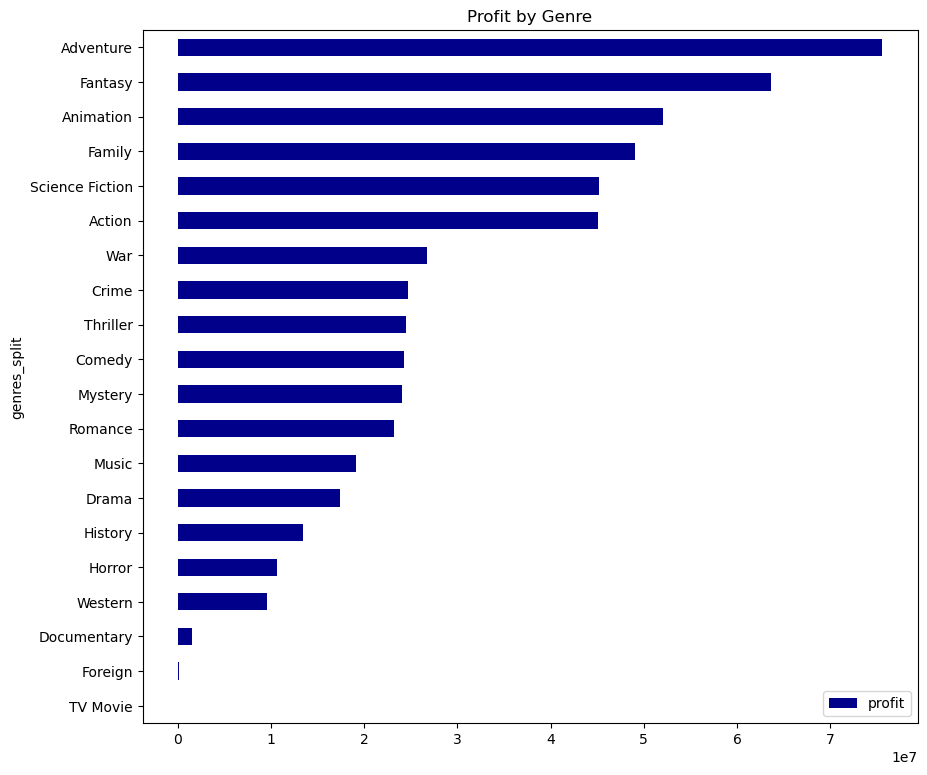

In [87]:
genres_avg.sort_values('profit', ascending = True, inplace = True) 
genres_avg[['profit']].plot.barh(title = 'Profit by Genre', color = ('DarkBlue'), figsize =(10,9))

In [ ]:
'''
### Research Questions (Q):
3. Which genres have high av. popularity?
'''

<Axes: title={'center': 'Budget and Revenue by Genre'}, ylabel='genres_split'>

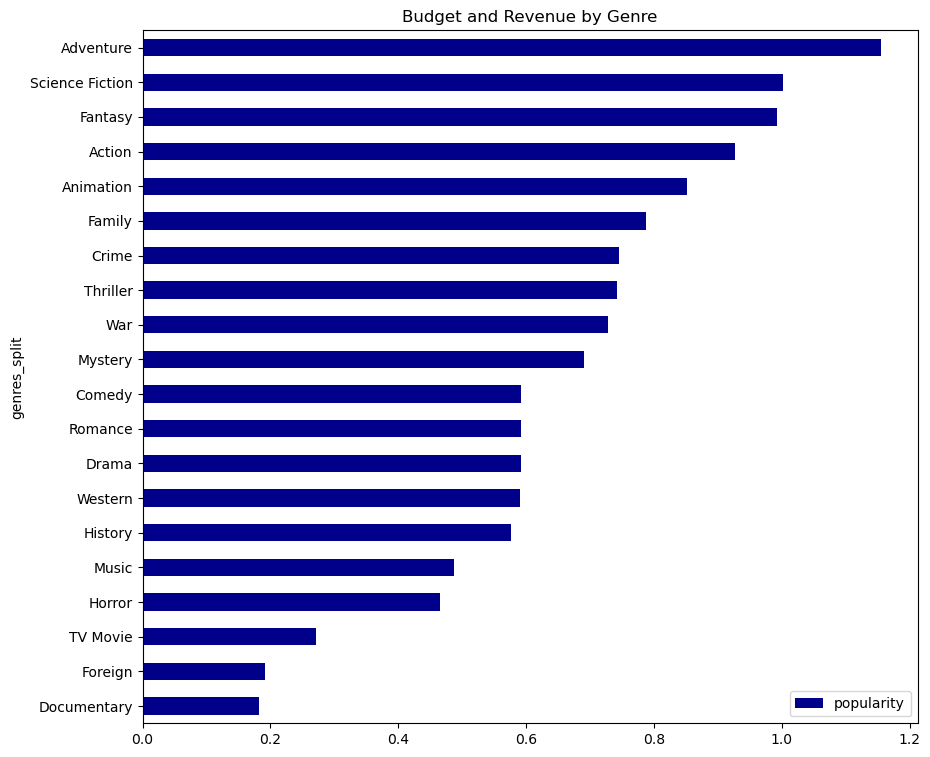

In [52]:
genres_avg.sort_values('popularity', ascending = True, inplace = True) 
genres_avg[['popularity']].plot.barh(title = 'Popularity by Genre', color = ('DarkBlue'), figsize =(10,9))

In [ ]:
'''
### Research Questions (Q):
4. Which genres have the highest number of movies with a voting avg. >=8? 
'''

In [53]:
movies_genre.head()

,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,profit,genres_split
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.500000,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.500000,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.500000,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.500000,1363528810,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,5/13/15,6185,7.100000,228436354,Action


In [60]:
vote_fifty = movies_genre[(movies_genre['vote_count']>= 50) & (movies_genre['vote_average']>= 8)]
vote_zero = movies_genre[(movies_genre['vote_average']>= 8)]

In [61]:
genres_vote=pd.DataFrame(vote_fifty.groupby('genres_split').vote_average.nunique()).sort_values('vote_average',ascending = True)

In [62]:
genres_vote

,vote_average
genres_split,
Fantasy,1
Science Fiction,1
Animation,1
Mystery,1
Horror,1
Family,1
Romance,2
Music,2
History,2


<Axes: title={'center': 'Vote Average by Genre'}, ylabel='genres_split'>

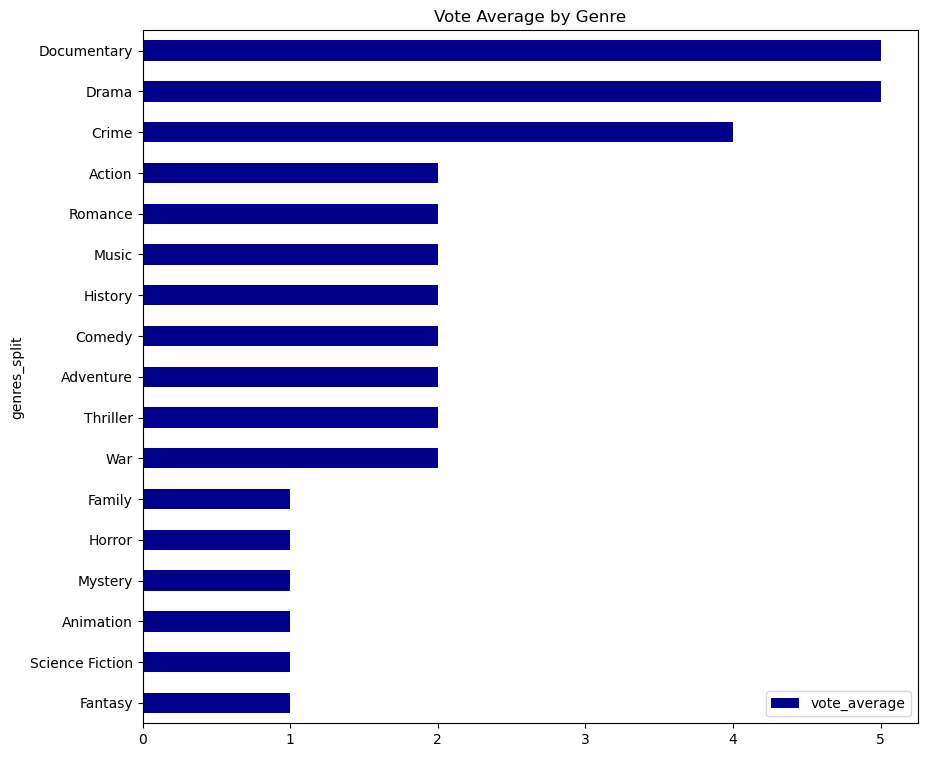

In [64]:
genres_vote.sort_values('vote_average', ascending = True, inplace = True) 
genres_vote[['vote_average']].plot.barh(title = 'Vote Average by Genre', color = ('DarkBlue'), figsize =(10,9))

In [65]:
genres_vote=pd.DataFrame(vote_zero.groupby('genres_split').vote_average.nunique()).sort_values('vote_average',ascending = True)

<Axes: title={'center': 'Vote Average by Genre'}, ylabel='genres_split'>

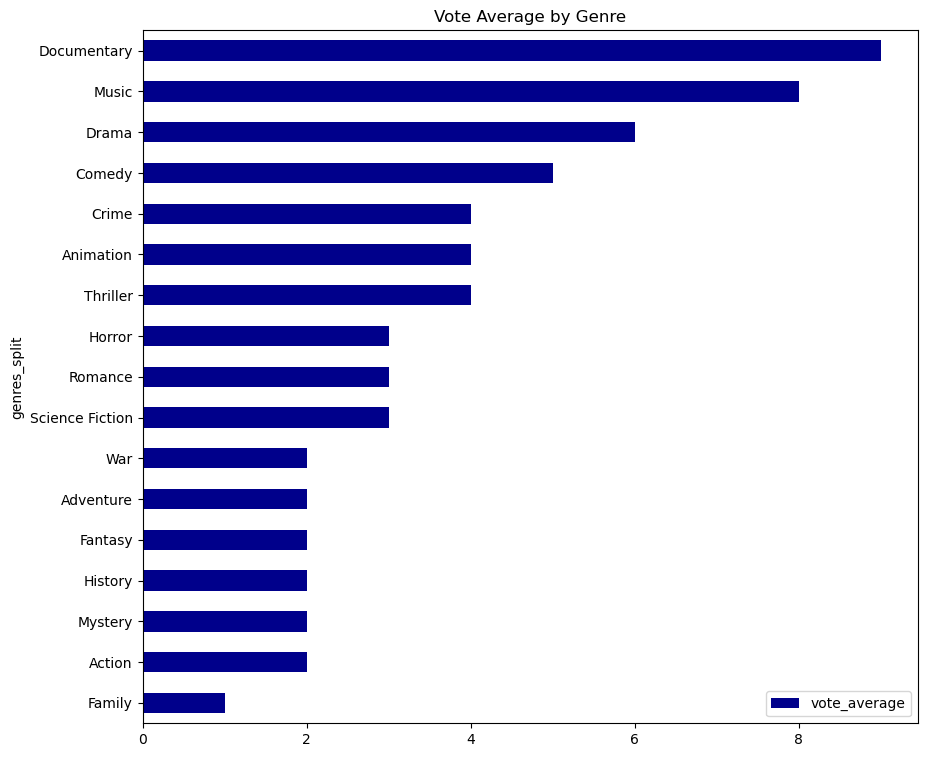

In [66]:
genres_vote.sort_values('vote_average', ascending = True, inplace = True) 
genres_vote[['vote_average']].plot.barh(title = 'Vote Average by Genre', color = ('DarkBlue'), figsize =(10,9))

In [ ]:
'''
### Research Hypotheses (H):
1. The best movies according to vote avg. return high profit and revenue.
'''

In [67]:

movies.drop_duplicates(inplace = True)
movies['profit'] = movies['revenue'] - movies['budget']
movies_genre = movies[['popularity', 'budget', 'revenue','original_title', 'runtime', 'genres', 'release_date', 'vote_count', 'vote_average', 'profit' ]]

In [70]:
movies.drop_duplicates(inplace = True)
movies['profit'] = movies['revenue'] - movies['budget']
movies_genre = movies[['popularity', 'budget', 'revenue','original_title', 'runtime', 'genres', 'release_date', 'vote_count', 'vote_average', 'profit' ]]

In [74]:
movies_counted=movies_genre[movies_genre['vote_count']>= 50]

movies_counted.corr(method = 'spearman')

/var/folders/g5/nhtdkkkd2mj4nprp7q9rlh4c0000gn/T/ipykernel_75786/3520750450.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  movies_counted.corr(method = 'spearman')


,popularity,budget,revenue,runtime,vote_count,vote_average,profit
popularity,1.000000,0.485149,0.588739,0.230518,0.768966,0.188670,0.498117
budget,0.485149,1.000000,0.714828,0.360230,0.554586,-0.044440,0.334390
revenue,0.588739,0.714828,1.000000,0.341707,0.682656,0.111731,0.842221
runtime,0.230518,0.360230,0.341707,1.000000,0.263460,0.285514,0.212060
vote_count,0.768966,0.554586,0.682656,0.263460,1.000000,0.284470,0.583602
vote_average,0.188670,-0.044440,0.111731,0.285514,0.284470,1.000000,0.198308
profit,0.498117,0.334390,0.842221,0.212060,0.583602,0.198308,1.000000


<Axes: xlabel='vote_average', ylabel='profit'>

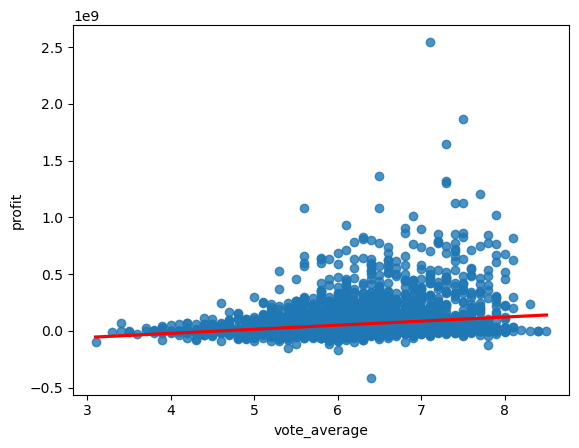

In [76]:
import seaborn as sns

sns.regplot(x='vote_average',y = 'profit', data = movies_counted, line_kws ={'color':'red'})


In [ ]:
'''
### Research Hypotheses (H):
2. The best movies according to popularity return high profit and revenue.
'''

In [77]:
movies_counted.corr(method = 'spearman')

/var/folders/g5/nhtdkkkd2mj4nprp7q9rlh4c0000gn/T/ipykernel_75786/425100243.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  movies_counted.corr(method = 'spearman')


,popularity,budget,revenue,runtime,vote_count,vote_average,profit
popularity,1.000000,0.485149,0.588739,0.230518,0.768966,0.188670,0.498117
budget,0.485149,1.000000,0.714828,0.360230,0.554586,-0.044440,0.334390
revenue,0.588739,0.714828,1.000000,0.341707,0.682656,0.111731,0.842221
runtime,0.230518,0.360230,0.341707,1.000000,0.263460,0.285514,0.212060
vote_count,0.768966,0.554586,0.682656,0.263460,1.000000,0.284470,0.583602
vote_average,0.188670,-0.044440,0.111731,0.285514,0.284470,1.000000,0.198308
profit,0.498117,0.334390,0.842221,0.212060,0.583602,0.198308,1.000000


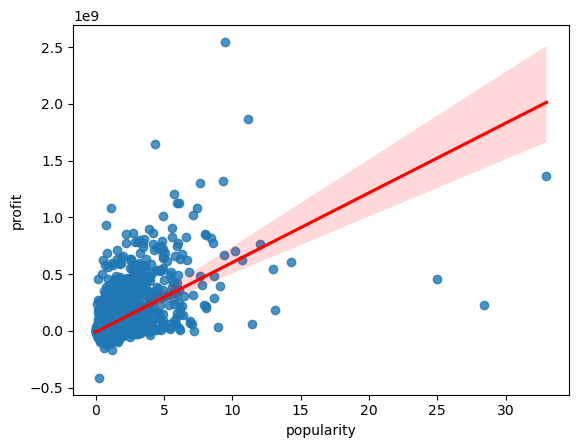

<Figure size 2000x1000 with 0 Axes>

In [80]:
import matplotlib.pyplot as plt
sns.regplot(x='popularity',y = 'profit', data = movies_counted, line_kws ={'color':'red'})
plt.figure(figsize = (20,10))
plt.show()

In [ ]:
'''
### Research Hypotheses (H):
3. Highly budgeted movies return high revenue and profit.
'''

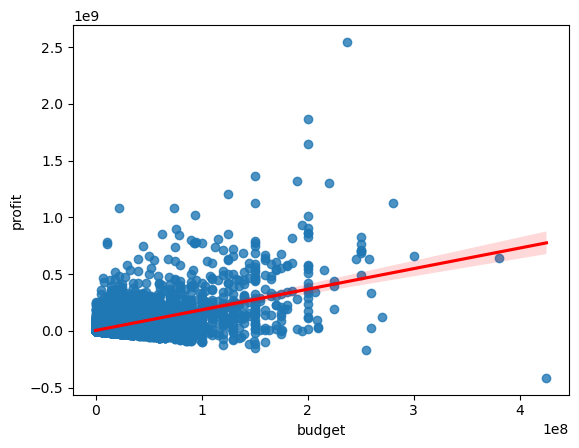

<Figure size 2000x1000 with 0 Axes>

In [84]:
import matplotlib.pyplot as plt
sns.regplot(x='budget',y = 'profit', data = movies_counted, line_kws ={'color':'red'})
plt.figure(figsize = (20,10))
plt.show()

In [ ]:
'''
### Research Hypotheses (H):
4. Highly budgeted movies have a high popularity.
'''

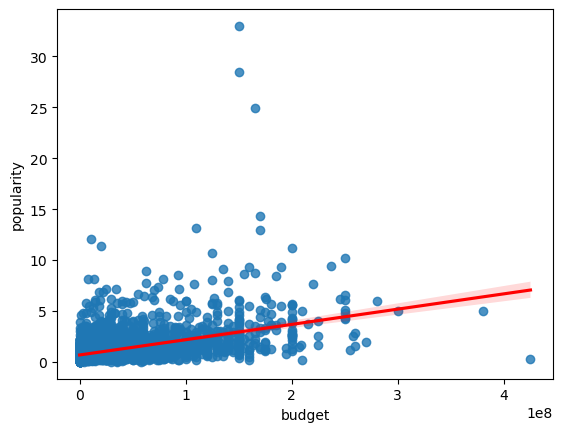

<Figure size 2000x1000 with 0 Axes>

In [85]:
import matplotlib.pyplot as plt
sns.regplot(x='budget',y = 'popularity', data = movies_counted, line_kws ={'color':'red'})
plt.figure(figsize = (20,10))
plt.show()